# Machine Learning - Tarea 3
---

---

<div style="text-align: right">
Vicente Lizana - 201310004-K
</div>
<div style="text-align: right">
Álvaro Valderrama - 201390005-4
</div>

---

In [477]:
import numpy as np
import pandas as pd
import seaborn as sbrn
import scipy as sp

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import utils as skut
from sklearn import model_selection as skms
from sklearn import tree as sktr
from sklearn import decomposition as skdc
from sklearn import preprocessing as skpp
from sklearn import svm as sksvm
from sklearn import model_selection as skms
from sklearn import ensemble as skens
from sklearn import metrics as skmt
from sklearn import discriminant_analysis as skda

from keras import models as krms
from keras import layers as krly
from keras import optimizers as kropt
from keras import regularizers as krrg
from keras.utils import np_utils as krnpu

In [2]:
def loading(curr, total):
    loading_string = '['+'='*curr+'>'+' '*(total-1-curr)+'] {:>3d}%'.format(int((curr+1)*100/total))
    loading_string = '\r'*len(loading_string) + loading_string
    print(loading_string, end='')

---

---
## 1.- Small circle inside Large circle

---
### 1.a

#### Generación de Datos

In [31]:
def do_circles(n=2000,noisy_n=0.05):
    generator = skut.check_random_state(10)
    linspace = np.linspace(0, 2 * np.pi, n // 2 + 1)[:-1]
    outer_circ_x = np.cos(linspace)
    outer_circ_y = np.sin(linspace)
    inner_circ_x = outer_circ_x * .3
    inner_circ_y = outer_circ_y * .3
    
    X = np.vstack((
        np.append(outer_circ_x, inner_circ_x),
        np.append(outer_circ_y, inner_circ_y)
    )).T
    
    y = np.hstack([
        np.zeros(n // 2, dtype=np.intp),
        np.ones(n // 2, dtype=np.intp)
    ])
    
    X += generator.normal(scale=noisy_n, size=X.shape)
    X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=0.5, random_state=42)
    
    return X_train, y_train, X_test, y_test

In [32]:
def plot_classifier(clf, X_train, Y_train, X_test, Y_test, model_type):
    f, axis = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(12, 8))
    axis.scatter(X_train[:,0], X_train[:,1], s=30, c=Y_train, zorder=10, cmap='cool')
    axis.scatter(X_test[:,0], X_test[:,1], s=20, c=Y_test, zorder=10, cmap='winter')
    XX, YY = np.mgrid[-2:2:200j, -2:2:200j]
    
    if model_type == 'tree':
        Z = clf.predict_proba(np.c_[XX.ravel(), YY.ravel()])[:,0]
    elif model_type == 'ann':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else:
        raise ValueError('model type not supported')
        
    Z = Z.reshape(XX.shape)
    Zplot = Z > 0.5
    axis.pcolormesh(XX, YY, Zplot, cmap='YlGn')
    axis.contour(XX, YY, Zplot, alpha=1, colors=["r"], linestyles=["-"], levels=[0.5])
    plt.show()

---
#### Datos:

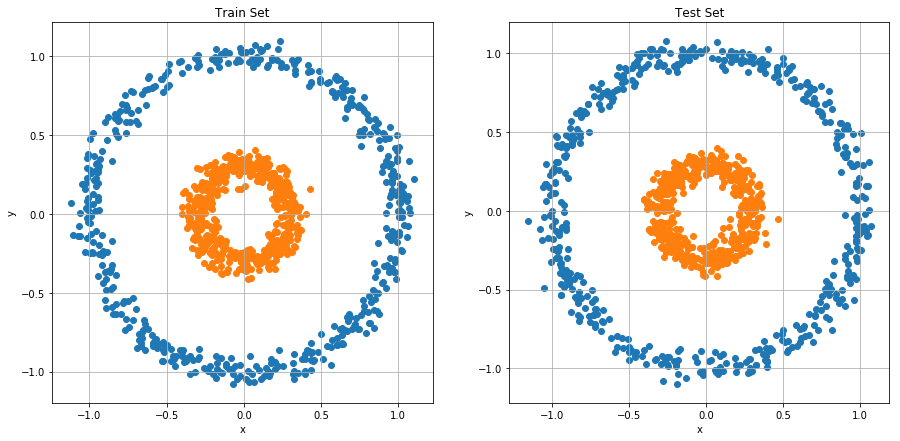

In [33]:
X_train, y_train, X_test, y_test = do_circles()

fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(121)
ax1.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1])
ax1.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1])
ax1.set_title("Train Set")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.grid()

ax2 = fig.add_subplot(122)
ax2.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1])
ax2.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1])
ax2.set_title("Test Set")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.grid()
plt.show()

---
### 1.b

#### Red con una sola neurona

In [34]:
n_h=1
model = krms.Sequential()
model.add(krly.Dense(1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(krly.Dense(n_h, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=kropt.SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=100, verbose=0)
scores = model.evaluate(X_test, y_test)
test_acc = scores[1]

1000/1000 [==============================] - 0s 34us/step


In [35]:
print("Accuracy over Test Set: {:>.3}".format(test_acc))

Accuracy over Test Set: 0.507


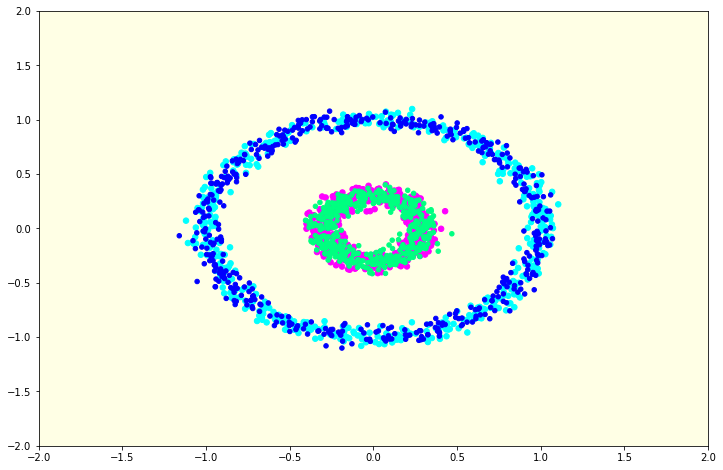

In [36]:
plot_classifier(model, X_train, y_train, X_test, y_test, 'ann')

---
#### Cambiando la función de activación:

In [29]:
n_h=1
model = krms.Sequential()
model.add(krly.Dense(1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='tanh'))
model.add(krly.Dense(n_h, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=kropt.SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=100, verbose=0)
scores = model.evaluate(X_test, y_test)
test_acc = scores[1]

NameError: name 'X_train' is not defined

In [41]:
print("Accuracy over Test Set: {:>.3}".format(test_acc))

Accuracy over Test Set: 0.667


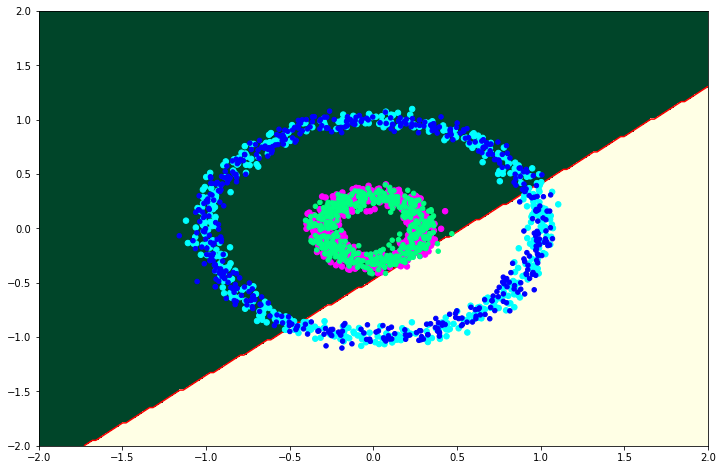

In [42]:
plot_classifier(model, X_train, y_train, X_test, y_test, 'ann')

---
### 1.c

#### Red con una _Hidden Layer_, dos neuronas.

In [43]:
n_h=2
model = krms.Sequential()
model.add(krly.Dense(n_h, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(krly.Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=kropt.SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=100, verbose=0)
scores = model.evaluate(X_test, y_test)
test_acc = scores[1]

1000/1000 [==============================] - 0s 108us/step


In [44]:
print(test_acc)

0.869


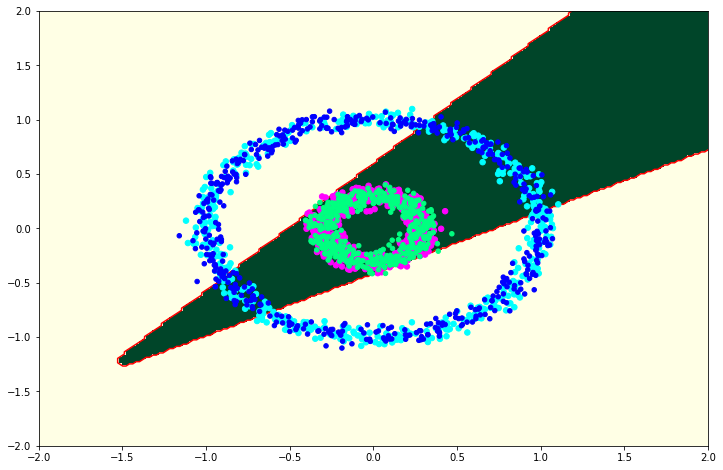

In [45]:
plot_classifier(model, X_train, y_train, X_test, y_test, 'ann')

---
#### Red con una _Hidden Layer_, 3 neuronas.

In [46]:
n_h=3
model = krms.Sequential()
model.add(krly.Dense(n_h, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(krly.Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=kropt.SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=100, verbose=0)
scores = model.evaluate(X_test, y_test)
test_acc = scores[1]

1000/1000 [==============================] - 0s 160us/step


In [47]:
print(test_acc)

1.0


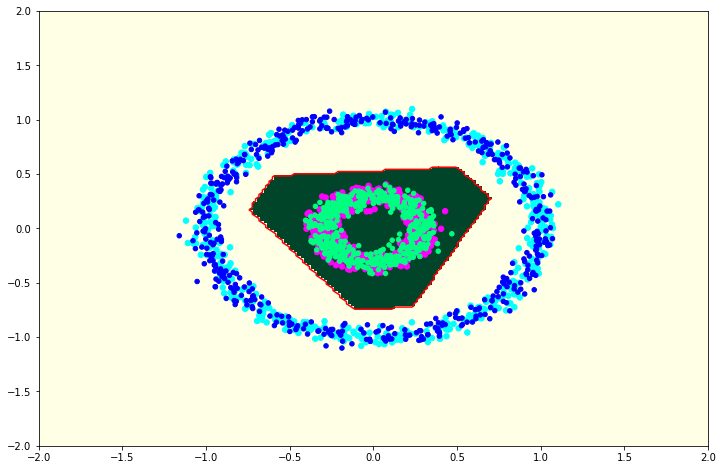

In [48]:
plot_classifier(model, X_train, y_train, X_test, y_test, 'ann')

---
#### Error

In [49]:
errors = []

for n_h in  2 ** np.arange(1,6):
    model = krms.Sequential()
    model.add(krly.Dense(n_h, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
    model.add(krly.Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(optimizer=kropt.SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=50, batch_size=100, verbose=0)
    score = model.evaluate(X_test, y_test)
    errors.append(score[0])

1000/1000 [==============================] - 0s 148us/step


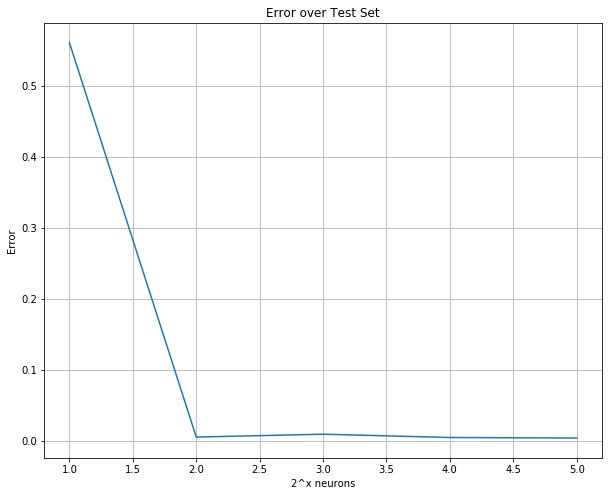

In [51]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(range(1, len(errors) + 1), errors)
ax.set_title("Error over Test Set")
ax.set_ylabel("Error")
ax.set_xlabel("2^x neurons")
ax.grid()
plt.show()

---
### 1.d

#### _Stump_

Test Accuracy = 0.67
Max depth = 1


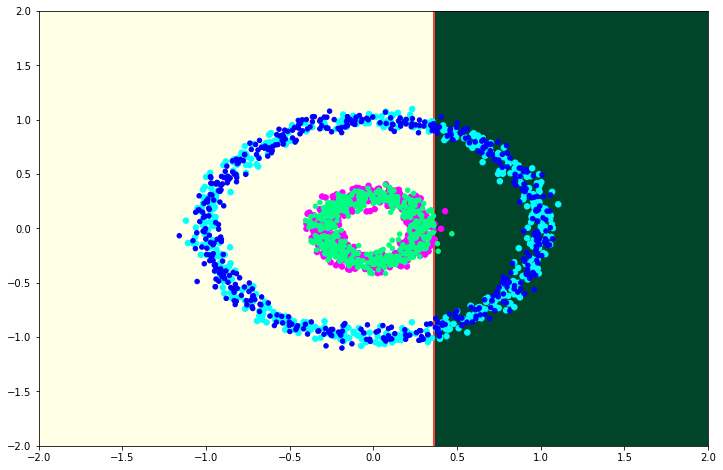

In [54]:
clf = sktr.DecisionTreeClassifier(criterion='gini', splitter='best', random_state=0, max_depth=1)
clf.fit(X_train,y_train)
acc_test = clf.score(X_test,y_test)
print("Test Accuracy = {}".format(acc_test))
print("Max depth = {}".format(clf.tree_.max_depth))
plot_classifier(clf, X_train, y_train, X_test, y_test, 'tree')

---
#### Otro intento:

Test Accuracy = 0.679
Max depth = 1


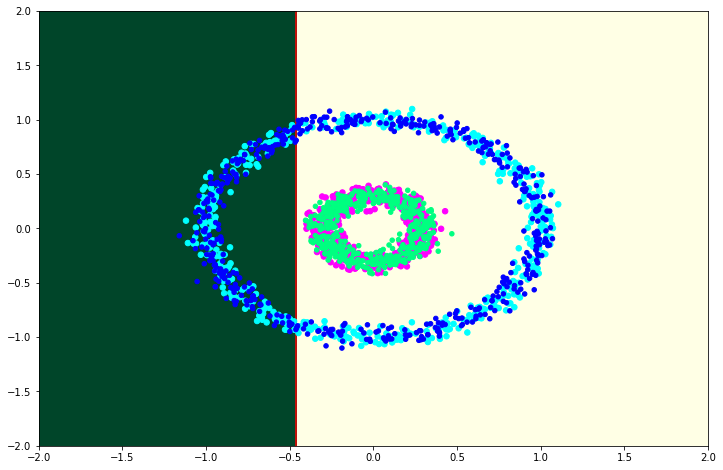

In [57]:
clf = sktr.DecisionTreeClassifier(criterion='entropy', splitter='random', random_state=0, max_depth=1)
clf.fit(X_train,y_train)
acc_test = clf.score(X_test,y_test)
print("Test Accuracy = {}".format(acc_test))
print("Max depth = {}".format(clf.tree_.max_depth))
plot_classifier(clf, X_train, y_train, X_test, y_test, 'tree')

---
### 1.e

#### Arbol de Clasificación

Test Accuracy = 0.924
Max depth = 3


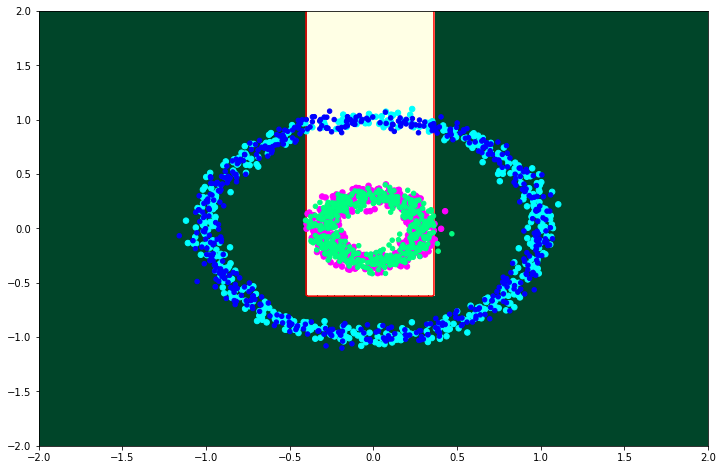

In [58]:
n_t=3
clf=sktr.DecisionTreeClassifier(criterion='gini', splitter='best', random_state=0, max_depth=n_t)
clf.fit(X_train,y_train)
acc_test = clf.score(X_test,y_test)
print("Test Accuracy = {}".format(acc_test))
print("Max depth = {}".format(clf.tree_.max_depth))
plot_classifier(clf, X_train, y_train, X_test, y_test, 'tree')

Test Accuracy = 0.994
Max depth = 4


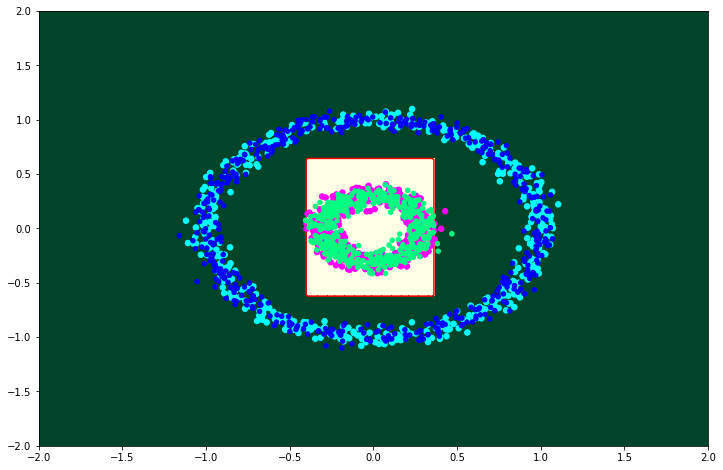

In [59]:
n_t=4
clf=sktr.DecisionTreeClassifier(criterion='gini', splitter='best', random_state=0, max_depth=n_t)
clf.fit(X_train,y_train)
acc_test = clf.score(X_test,y_test)
print("Test Accuracy = {}".format(acc_test))
print("Max depth = {}".format(clf.tree_.max_depth))
plot_classifier(clf, X_train, y_train, X_test, y_test, 'tree')

---
### 1.f

#### PCA + Kernel Gaussiano

In [21]:
kpca = skdc.KernelPCA(n_components=2,kernel="rbf", gamma=5)
kpca = kpca.fit(X_train)
Xkpca_train = kpca.transform(X_train)
Xkpca_test = kpca.transform(X_test)

---
### 1.g

#### Separación mediante frontera lineal

Test Accuracy = 1.0
Max depth = 1


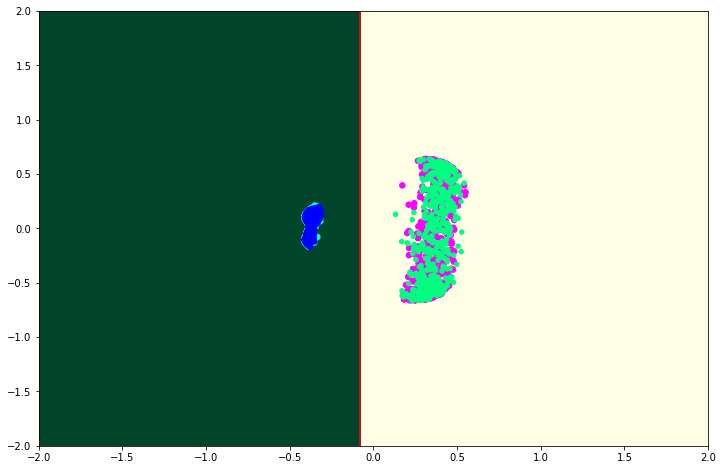

In [55]:
clf = sktr.DecisionTreeClassifier(criterion='gini', splitter='best', random_state=0, max_depth=1)
clf.fit(Xkpca_train,y_train)
acc_test = clf.score(Xkpca_test,y_test)
print("Test Accuracy = {}".format(acc_test))
print("Max depth = {}".format(clf.tree_.max_depth))
plot_classifier(clf, Xkpca_train, y_train, Xkpca_test, y_test, 'tree')

---

---
## 2.- Bike Sharing

---
### 2.a

#### Datos

In [290]:
dftrain = pd.read_csv('bike_sharing_train.csv')
dfval = pd.read_csv('bike_sharing_val.csv')
dftest = pd.read_csv('bike_sharing_test.csv')
ntrain = len(dftrain)
nval = len(dftrain) + len(dfval)
df = pd.concat([dftrain, dfval, dftest])
df.describe()

,Unnamed: 0,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,5442.500000,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,3142.661849,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2721.250000,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,5442.500000,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,8163.750000,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,10885.000000,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


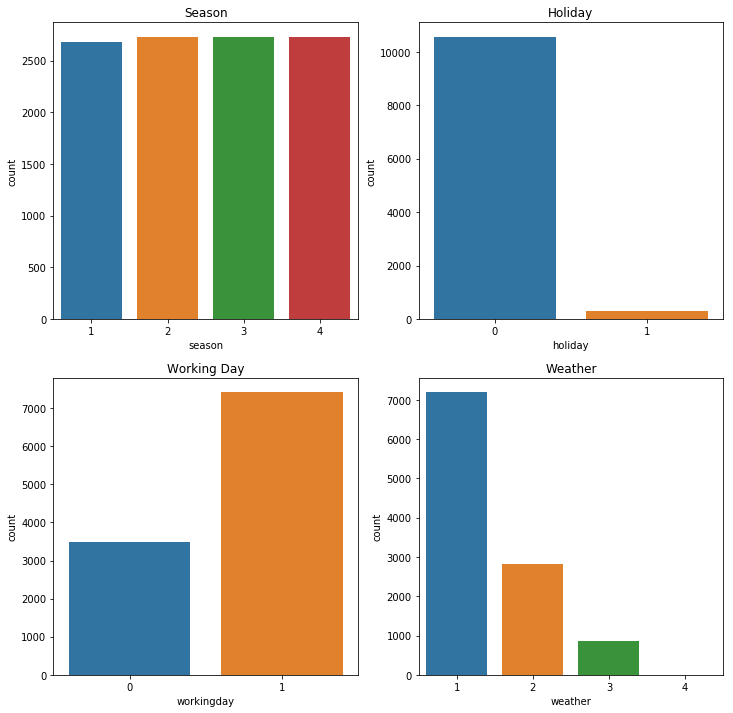

In [291]:
fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(221)
ax1.set_title("Season")
sbrn.countplot(x='season', data=df, ax=ax1)

ax2 = fig.add_subplot(222)
ax2.set_title("Holiday")
sbrn.countplot(x='holiday', data=df, ax=ax2)

ax3 = fig.add_subplot(223)
ax3.set_title("Working Day")
sbrn.countplot(x='workingday', data=df, ax=ax3)

ax4 = fig.add_subplot(224)
ax4.set_title("Weather")
sbrn.countplot(x='weather', data=df, ax=ax4)

plt.show()

In [292]:
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['hour'] = pd.to_numeric(df['hour'])
df.describe()

,Unnamed: 0,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,5442.500000,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613
std,3142.661849,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2721.250000,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000
50%,5442.500000,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000
75%,8163.750000,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000
max,10885.000000,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000


---
### 2.b

#### Arbol de Regresión

In [344]:
def eval_bikemodel(y_predict, y_true):
    diff = np.log(y_predict+1.0) - np.log(y_true+1.0)
    return np.sqrt(np.sum(np.square(diff))/len(y_predict))

def plot_predictions(y_predict, y_true, model=''):
    plt.figure(figsize=(7,7))
    plt.plot(y_true, y_predict, '.')
    plt.plot((0,1000), (0,1000), 'r')
    plt.title('Predictions ' + model)
    plt.xlabel('real y')
    plt.ylabel('predicted y')
    plt.grid()
    plt.show()

     SCORE TEST = 0.7033880538
KAGG EVAL TRAIN = 0.0285162833
 KAGG EVAL TEST = 0.5742388006


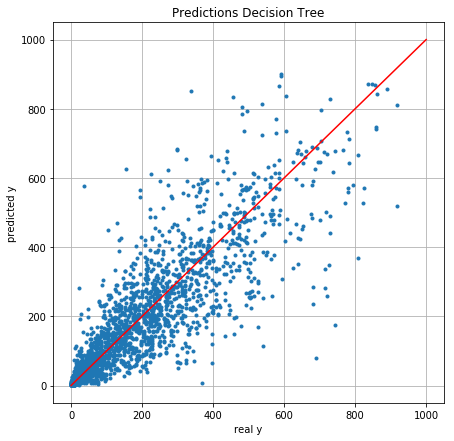

In [520]:
Xdf = df.loc[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour']]
Ydf = df.loc[:,'count']
X_train_2 = Xdf[0:ntrain].values
X_val_2 = Xdf[ntrain:nval].values
X_test_2 = Xdf[nval:].values
Y_train_2 = Ydf[0:ntrain].values
Y_val_2 = Ydf[ntrain:nval].values
Y_test_2 = Ydf[nval:].values

model = sktr.DecisionTreeRegressor(random_state=0)
model.fit(X_train_2,Y_train_2)
score_test_2 = model.score(X_test_2,Y_test_2)
print("     SCORE TEST = {:>.10f}".format(score_test_2))

Y_pred_train_2 = model.predict(X_train_2)
Y_pred_val_2 = model.predict(X_val_2)
Y_pred_test_2 = model.predict(X_test_2)
kagg_train_2 = eval_bikemodel(Y_pred_train_2,Y_train_2)
kagg_val_2 = eval_bikemodel(Y_pred_val_2,Y_val_2)
kagg_test_2 = eval_bikemodel(Y_pred_test_2,Y_test_2)
print("KAGG EVAL TRAIN = {:>.10f}".format(kagg_train_2))
print(" KAGG EVAL TEST = {:>.10f}".format(kagg_test_2))

plot_predictions(Y_test_2, Y_pred_test_2, model='Decision Tree')

---
### 2.c

#### _Tunning_ de Hiperparámetros

In [521]:
errors_tree_max_depth_2_tr = []
errors_tree_max_depth_2_v = []
errors_tree_max_depth_2_t = []
for i in range(1,31):
    model = sktr.DecisionTreeRegressor(random_state=0, max_depth=i, splitter='random')
    model.fit(X_train_2, Y_train_2)
    
    Y_pred_train = model.predict(X_train_2)
    kagg_val = eval_bikemodel(Y_pred_train, Y_train_2)
    errors_tree_max_depth_2_tr.append(kagg_val)
    
    Y_pred_val = model.predict(X_val_2)
    kagg_val = eval_bikemodel(Y_pred_val, Y_val_2)
    errors_tree_max_depth_2_v.append(kagg_val)
    
    Y_pred_test = model.predict(X_test_2)
    kagg_val = eval_bikemodel(Y_pred_test, Y_test_2)
    errors_tree_max_depth_2_t.append(kagg_val)

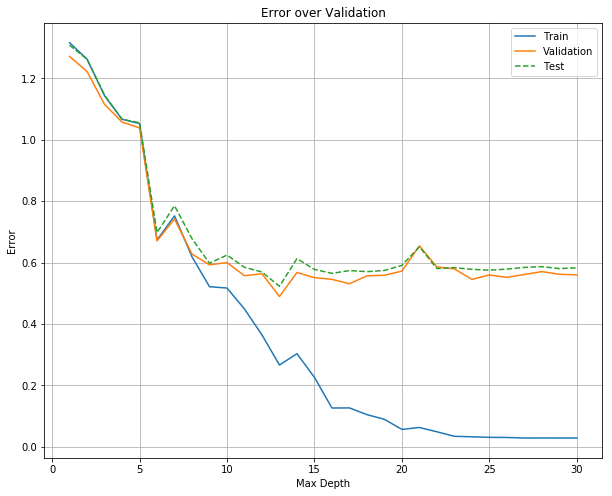

In [522]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(range(1,31), errors_tree_max_depth_2_tr, label='Train')
ax.plot(range(1,31), errors_tree_max_depth_2_v, label='Validation')
ax.plot(range(1,31), errors_tree_max_depth_2_t, '--', label='Test')
ax.grid()
ax.set_title("Error over Validation")
ax.set_xlabel("Max Depth")
ax.set_ylabel("Error")
ax.legend()
plt.show()

---

In [523]:
errors_tree_max_depth_2_tr = []
errors_tree_max_depth_2_v = []
errors_tree_max_depth_2_t = []
for i in range(1,31):
    model = sktr.DecisionTreeRegressor(random_state=0, max_depth=i)
    model.fit(X_train_2, Y_train_2)
    
    Y_pred_train = model.predict(X_train_2)
    kagg_val = eval_bikemodel(Y_pred_train, Y_train_2)
    errors_tree_max_depth_2_tr.append(kagg_val)
    
    Y_pred_val = model.predict(X_val_2)
    kagg_val = eval_bikemodel(Y_pred_val, Y_val_2)
    errors_tree_max_depth_2_v.append(kagg_val)
    
    Y_pred_test = model.predict(X_test_2)
    kagg_val = eval_bikemodel(Y_pred_test, Y_test_2)
    errors_tree_max_depth_2_t.append(kagg_val)

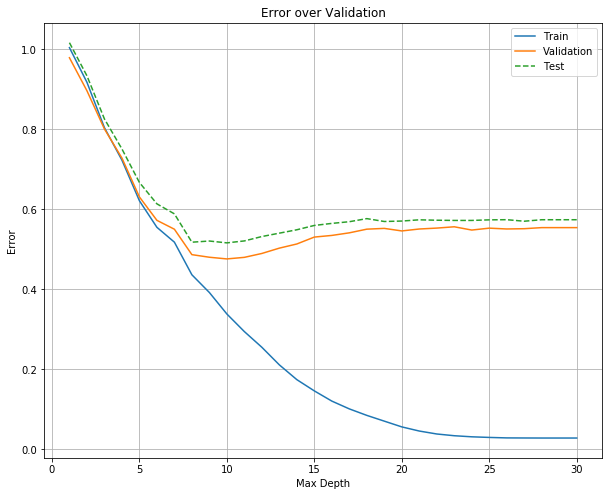

In [524]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(range(1,31), errors_tree_max_depth_2_tr, label='Train')
ax.plot(range(1,31), errors_tree_max_depth_2_v, label='Validation')
ax.plot(range(1,31), errors_tree_max_depth_2_t, '--', label='Test')
ax.grid()
ax.set_title("Error over Validation")
ax.set_xlabel("Max Depth")
ax.set_ylabel("Error")
ax.legend()
plt.show()

---

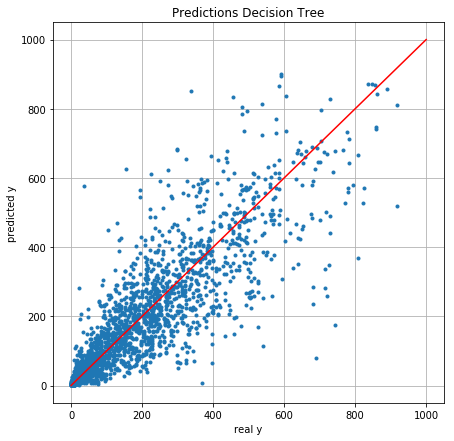

 KAGG EVAL VALIDATION = 0.4762735846
 KAGG EVAL TEST = 0.5163963473


In [525]:
best = np.argmin(errors_tree_max_depth_2_v)
model = sktr.DecisionTreeRegressor(random_state=0, max_depth=best+1)
model.fit(X_train_2, Y_train_2)
Y_pred_val = model.predict(X_val_2)
kagg_val = eval_bikemodel(Y_pred_val, Y_val_2)
Y_pred_val = model.predict(X_test_2)
kagg_test = eval_bikemodel(Y_pred_val, Y_test_2)
plot_predictions(Y_test_2, Y_pred_test, model='Decision Tree')
print(" KAGG EVAL VALIDATION = {:>.10f}".format(kagg_val))
print(" KAGG EVAL TEST = {:>.10f}".format(kagg_test))

---
### 2.d

#### _Tunning_ de la Representación

In [526]:
def qqplot_target(y):
    fig = plt.figure(figsize=(14, 14))
    axes = []
    for i in range(1,10):
        axes.append(fig.add_subplot(3, 3, i))
        sp.stats.probplot(y ** (i/10), dist=sp.stats.norm, plot=axes[-1])
        axes[-1].set_title("Q-Q {}".format(i/10))
        axes[-1].grid()

    plt.show()

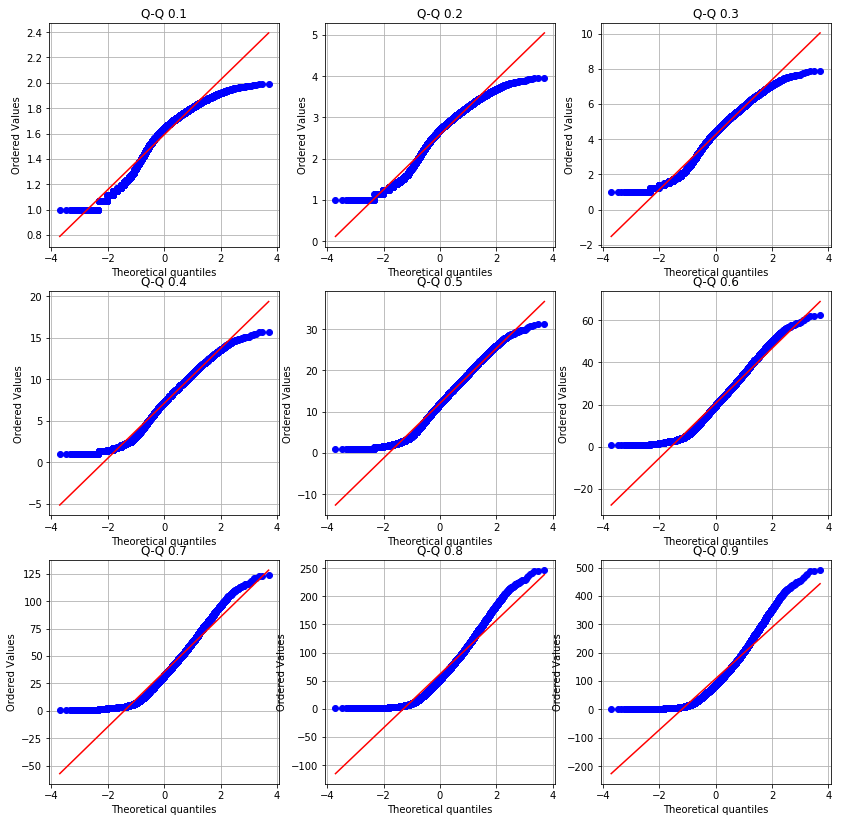

In [527]:
qqplot_target(Y_train_2)

In [393]:
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek # 0:lunes, 6:domingo
df['cday'] = pd.to_numeric(df['cday'])

df['day'] = pd.to_datetime(df['datetime']).dt.day
df['month'] = pd.to_datetime(df['datetime']).dt.month
df['year'] = pd.to_datetime(df['datetime']).dt.year

Xdf = df.loc[:,['holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','cday','day','month','year']]

new_X_train_2 = Xdf[0:ntrain].values
new_X_val_2 = Xdf[ntrain:nval].values
new_X_test_2 = Xdf[nval:].values
new_Y_train_2 = Y_train_2 ** (3/5)
new_Y_val_2 = Y_val_2 ** (3/5)
new_Y_test_2 = Y_test_2 ** (3/5)
Xdf.head()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,cday,day,month,year
0,0,0,1,9.84,1749.817170,75,0.0000,3,5,1,1,2011
1,0,0,1,9.84,1749.817170,75,0.0000,4,5,1,1,2011
2,0,0,2,9.84,1281.635170,75,6.0032,5,5,1,1,2011
3,0,0,1,9.02,1503.261027,80,0.0000,6,5,1,1,2011
4,0,0,1,8.20,1281.635170,86,0.0000,7,5,1,1,2011


In [394]:
def new_eval_bikemodel(y_predict, y_true):
#     diff = np.log(y_predict**2+1.0) - np.log(y_true**2+1.0)
    diff = np.log(y_predict**(5/3)+1.0) - np.log(y_true**(5/3)+1.0)
    return np.sqrt(np.sum(np.square(diff))/len(y_predict))

def new_plot_predictions(y_predict, y_true, model=''):
    plt.figure(figsize=(7,7))
#     plt.plot(y_true**2, y_predict**2, '.')
    plt.plot(y_true**(5/3), y_predict**(5/3), '.')
    plt.plot((0,1000), (0,1000), 'r')
    plt.title('Predictions ' + model)
    plt.xlabel('real y')
    plt.ylabel('predicted y')
    plt.grid()
    plt.show()

---

In [395]:
errors_tree_max_depth_2_tr = []
errors_tree_max_depth_2_v = []
errors_tree_max_depth_2_t = []
for i in range(1,31):
    model = sktr.DecisionTreeRegressor(random_state=0, max_depth=i)
    model.fit(new_X_train_2, new_Y_train_2)
    
    Y_pred_train = model.predict(new_X_train_2)
    kagg_val = new_eval_bikemodel(Y_pred_train, new_Y_train_2)
    errors_tree_max_depth_2_tr.append(kagg_val)
    
    Y_pred_val = model.predict(new_X_val_2)
    kagg_val = new_eval_bikemodel(Y_pred_val, new_Y_val_2)
    errors_tree_max_depth_2_v.append(kagg_val)
    
    Y_pred_test = model.predict(new_X_test_2)
    kagg_val = new_eval_bikemodel(Y_pred_test, new_Y_test_2)
    errors_tree_max_depth_2_t.append(kagg_val)

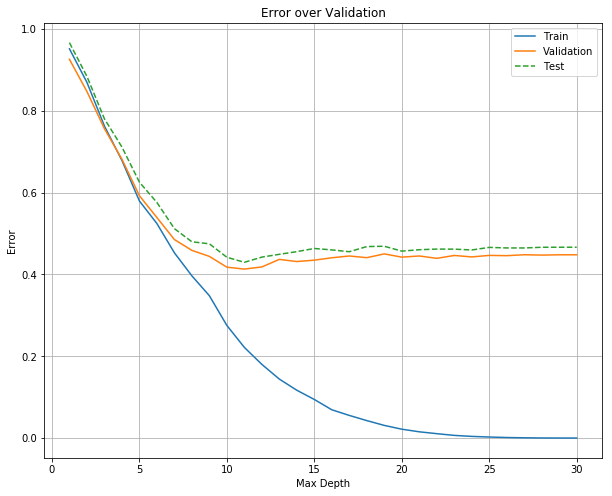

In [396]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(range(1,31), errors_tree_max_depth_2_tr, label='Train')
ax.plot(range(1,31), errors_tree_max_depth_2_v, label='Validation')
ax.plot(range(1,31), errors_tree_max_depth_2_t, '--', label='Test')
ax.grid()
ax.set_title("Error over Validation")
ax.set_xlabel("Max Depth")
ax.set_ylabel("Error")
ax.legend()
plt.show()

---

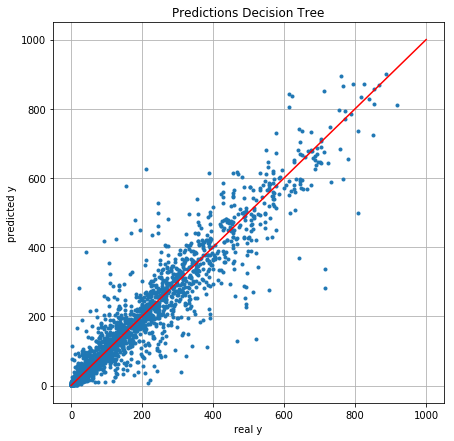

 KAGG EVAL VALIDATION = 0.4132156548
 KAGG EVAL TEST = 0.4298332868


In [397]:
best = np.argmin(errors_tree_max_depth_2_v)
model = sktr.DecisionTreeRegressor(random_state=0, max_depth=best+1)
model.fit(new_X_train_2, new_Y_train_2)
Y_pred_val = model.predict(new_X_val_2)
kagg_val = new_eval_bikemodel(Y_pred_val, new_Y_val_2)
Y_pred_test = model.predict(new_X_test_2)
kagg_test = new_eval_bikemodel(Y_pred_test, new_Y_test_2)
new_plot_predictions(new_Y_test_2, Y_pred_test, model='Decision Tree')
print(" KAGG EVAL VALIDATION = {:>.10f}".format(kagg_val))
print(" KAGG EVAL TEST = {:>.10f}".format(kagg_test))

---
### 2.e

#### SVM no lineal

In [577]:
dftrain = pd.read_csv('bike_sharing_train.csv')
dfval = pd.read_csv('bike_sharing_val.csv')
dftest = pd.read_csv('bike_sharing_test.csv')

In [578]:
def new_new_eval_bikemodel(y_predict, y_true):
    diff = np.log(np.e**y_predict+1.0) - np.log(np.e**y_true+1.0)
    return np.sqrt(np.sum(np.square(diff))/len(y_predict))

def new_new_plot_predictions(y_predict, y_true, model=''):
    plt.figure(figsize=(7,7))
    plt.plot(np.e**y_true, np.e**y_predict, '.')
    plt.plot((0,1000), (0,1000), 'r')
    plt.title('Predictions ' + model)
    plt.xlabel('real y')
    plt.ylabel('predicted y')
    plt.grid()
    plt.show()

In [579]:
df = pd.concat([dftrain, dfval, dftest])
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek
df['hour'] = pd.to_numeric(df['hour'])
df['cday'] = pd.to_numeric(df['cday'])

df['day'] = pd.to_datetime(df['datetime']).dt.day
df['month'] = pd.to_datetime(df['datetime']).dt.month
df['year'] = pd.to_datetime(df['datetime']).dt.year

Xdf = df.loc[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','cday','day','month','year']]
Xdf = pd.get_dummies(Xdf,columns=['season', 'weather','hour','cday','day','month','year'])
Ydf=df.loc[:,'count']

X_train_2 = Xdf[0:ntrain].values
X_val_2 = Xdf[ntrain:nval].values
X_test_2 = Xdf[nval:].values

Y_train_2 = np.log(Ydf[0:ntrain].values)
Y_val_2 = np.log(Ydf[ntrain:nval].values)
Y_test_2 = np.log(Ydf[nval:].values)

Xdf.head()

,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2011,year_2012
0,0,0,9.84,14.395,75,0.0000,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,9.84,14.395,75,0.0000,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,9.84,12.880,75,6.0032,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,9.02,13.635,80,0.0000,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,8.20,12.880,86,0.0000,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [504]:
scalerX = skpp.StandardScaler()
X_train_2 = scalerX.fit_transform(X_train_2)
X_val_2 = scalerX.fit_transform(X_val_2)
X_test_2 = scalerX.transform(X_test_2)

model = sksvm.SVR()
model.fit(X_train_2,Y_train_2)

Y_pred_train_2 = model.predict(X_train_2)
Y_pred_val_2 = model.predict(X_val_2)
Y_pred_test_2 = model.predict(X_test_2)

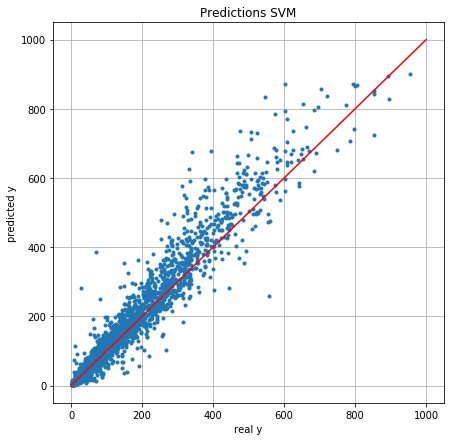

 KAGG EVAL VALIDATION = 0.3085455357
 KAGG EVAL TEST = 0.3364678330


In [505]:
new_new_plot_predictions(Y_test_2, Y_pred_test_2, model='SVM')
kagg_val = new_new_eval_bikemodel(Y_pred_val_2, Y_val_2)
kagg_test = new_new_eval_bikemodel(Y_pred_test_2, Y_test_2)
print(" KAGG EVAL VALIDATION = {:>.10f}".format(kagg_val))
print(" KAGG EVAL TEST = {:>.10f}".format(kagg_test))

---
### 2.f

#### _Tunning_ de Hiperparámetros

In [545]:
svr_cs = np.linspace(0.2, 2, 10)
svr_epsilons = np.linspace(0.02, 0.2, 10)

plot_x, plot_y = np.meshgrid(svr_cs, svr_epsilons)
scores_svr = np.zeros(plot_x.shape)

best_score = 1
best_i = 0
best_j = 0
for i in range(len(svr_cs)):
    for j in range(len(svr_epsilons)):
        model = sksvm.SVR(C=svr_cs[i],epsilon=svr_epsilons[j])
        model.fit(X_train_2,Y_train_2)
        Y_pred_val_2 = model.predict(X_val_2)
        scores_svr[i,j] = new_new_eval_bikemodel(Y_pred_val_2,Y_val_2)
        if scores_svr[i,j] < best_score:
            best_score = scores_svr[i,j]
            best_i = i
            best_j = j
        loading(i*len(svr_cs)+j, len(svr_cs)*len(svr_epsilons))

[===================================================================================================>] 100%

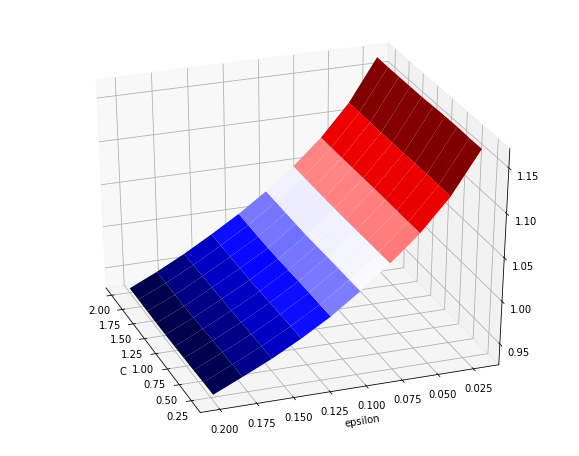

In [556]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')
ax.view_init(30, 160)
ax.plot_surface(plot_x, plot_y, scores_svr, cmap='seismic')
ax.set_xlabel('C')
ax.set_ylabel('epsilon')
plt.show()

---
### 2.g

#### _K-Folds_

In [575]:
kf = skms.KFold(n_splits=5)
Xm = np.vstack([X_train_2, X_val_2])
ym = np.hstack([Y_train_2, Y_val_2])

srv_cs = [1.9, 1.95, 2]
srv_epsilon = [0.00005, 0.0001, 0.00015]
new_scores_svr = np.zeros((3,3))

l = 0
for i in range(3):
    for j in range(3):
        mse_cv = []
        for train, val in kf.split(Xm):
            model = sksvm.SVR(C=1.95, epsilon=0.0001)
            model.fit(Xm[train], ym[train])
            yhat_val = model.predict(Xm[val])
            ytrue_val = ym[val]
            score_fold = new_new_eval_bikemodel(yhat_val,ytrue_val)
            mse_cv.append(score_fold)
            loading(l, 45)
            l += 1
        new_scores_svr[i,j] = np.mean(mse_cv)

In [576]:
new_scores_svr

array([[ 10.64581053,  10.64581053,  10.64581053],
       [ 10.64581053,  10.64581053,  10.64581053],
       [ 10.64581053,  10.64581053,  10.64581053]])

---
### 2.h

#### Ensamblado de dos Máquinas

In [550]:
Ydf_count = df.loc[:,'count'] # demanda total
Ydf_reg = df.loc[:,'registered'] # demanda registrada
Ydf_cas = df.loc[:,'casual'] # demanda casual

Y_train_2_count = np.log(Ydf_count[:ntrain].values+0.01)
Y_val_2_count = np.log(Ydf_count[ntrain:nval].values+0.01)
Y_test_2_count = np.log(Ydf_count[nval:].values+0.01)

Y_train_2_reg = np.log(Ydf_reg[:ntrain].values+0.01)
Y_val_2_reg = np.log(Ydf_reg[ntrain:nval].values+0.01)
Y_test_2_reg = np.log(Ydf_reg[nval:].values+0.01)

Y_train_2_cas = np.log(Ydf_cas[:ntrain].values+0.01)
Y_val_2_cas = np.log(Ydf_cas[ntrain:nval].values+0.01)
Y_test_2_cas = np.log(Ydf_cas[nval:].values+0.01)

---

In [557]:
model_reg = sksvm.SVR()
model_reg.fit(X_train_2,Y_train_2_reg)
Y_pred_val_reg_2 = model_reg.predict(X_val_2)
reg_score = eval_bikemodel(np.e ** Y_pred_val_reg_2 - 0.01, np.e ** Y_val_2_reg - 0.01)

model_cas = sksvm.SVR()
model_cas.fit(X_train_2,Y_train_2_cas)
Y_pred_val_cas_2 = model_cas.predict(X_val_2)
cas_score = eval_bikemodel(np.e ** Y_pred_val_cas_2 - 0.01, np.e ** Y_val_2_cas - 0.01)

print("Registrated score: {}".format(reg_score))
print("     Casual score: {}".format(cas_score))

Registrated score: 1.045344411651942
     Casual score: 0.860940125737449


In [558]:
def join_m(y_cas, y_reg):
    return (np.e ** y_cas) + (np.e ** y_reg) - 0.02

In [559]:
Y_pred_val_2 = join_m(Y_pred_val_reg_2, Y_pred_val_cas_2)
print("Count score: {}".format(eval_bikemodel(Y_pred_val_2, (np.e ** Y_val_2) - 0.01)))

Count score: 1.023005251415107


---
### 2.i

#### Algoritmo Genérico

In [564]:
X_train_2 = Xdf[0:ntrain].values
X_val_2 = Xdf[ntrain:nval].values
X_test_2 = Xdf[nval:].values

Y_train_2 = Ydf[0:ntrain].values ** (3/5)
Y_val_2 = Ydf[ntrain:nval].values ** (3/5)
Y_test_2 = Ydf[nval:].values ** (3/5)

In [573]:
max_depth = 100
model = skens.RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=0)
model.fit(X_train_2, Y_train_2)
y_pred_val_2 = model.predict(X_val_2)
err_val = new_eval_bikemodel(y_pred_val_2, Y_val_2)
y_pred_test_2 = model.predict(X_test_2)
err_test = new_eval_bikemodel(y_pred_test_2, Y_test_2)
print("Validation Error: {}".format(err_val))
print("      Test Error: {}".format(err_test))

Validation Error: 0.3801395440983982
      Test Error: 0.42360628594773425


---

---
## 3.- Calidad de un Vino

---
### 3.a

#### Datos

In [53]:
df_3_red = pd.read_csv("winequality-red.csv",sep=";")
df_3_red['type'] = [1 for i in range(df_3_red.shape[0])]
df_3_white = pd.read_csv("winequality-white.csv",sep=";")
df_3_white['type'] = [0 for i in range(df_3_white.shape[0])]
df_3 = pd.concat([df_3_red,df_3_white], axis=0)

df_3.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [54]:
df_3.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


---
### 3.b

#### Preparación de los Datos

In [67]:
df_3['good_quality'] = [1 if q > 5 else 0 for q in df_3.quality]
df_3_data = df_3.drop(['good_quality', 'quality'], axis=1)
df_3_target = df_3['good_quality']

X_train_3, X_test_3, y_train_3, y_test_3 = skms.train_test_split(df_3_data, df_3_target, test_size=0.25)
X_train_3.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
218,5.7,0.28,0.24,17.5,0.044,60.0,167.0,0.99890,3.31,0.44,9.4,0
3662,6.1,0.60,0.12,1.8,0.050,11.0,76.0,0.99268,3.42,0.48,10.4,0
1881,7.2,0.20,0.61,16.2,0.043,14.0,103.0,0.99870,3.06,0.36,9.2,0
1218,7.2,0.26,0.44,7.1,0.027,25.0,126.0,0.99300,3.02,0.34,11.1,0
443,10.0,0.44,0.49,2.7,0.077,11.0,19.0,0.99630,3.23,0.63,11.6,1


Se elimina también la columna `'quality'` ya que la utilizamos para la extracción de `'good_quality'`, si no la eliminamos el _learner_ podría simplemente aprender a fijarse si es mayor a 5 para obtener el _target_.

---

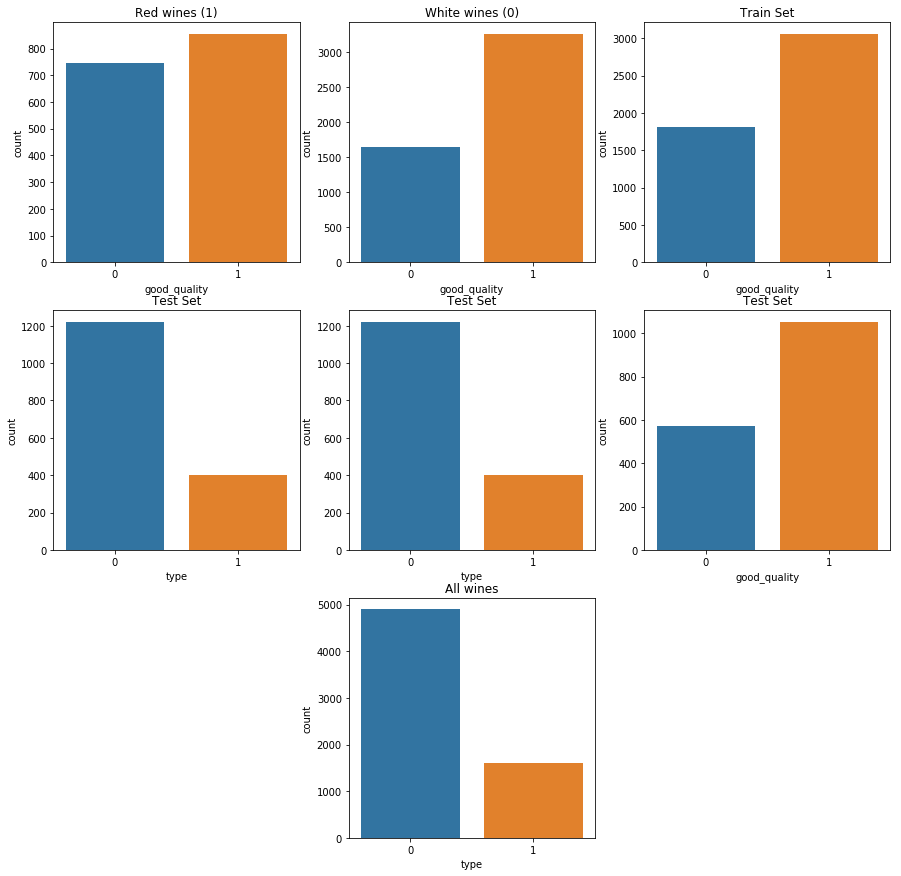

In [70]:
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(331)
ax1.set_title("Red wines (1)")
sbrn.countplot(x='good_quality', data=df_3[df_3['type'] == 1], ax=ax1)

ax2 = fig.add_subplot(332)
ax2.set_title("White wines (0)")
sbrn.countplot(x='good_quality', data=df_3[df_3['type'] == 0], ax=ax2)

X_train_3_full = pd.DataFrame(X_train_3)
X_train_3_full['good_quality'] = y_train_3
ax3 = fig.add_subplot(333)
ax3.set_title("Train Set")
sbrn.countplot(x='good_quality', data=X_train_3_full, ax=ax3)
X_train_3 = X_train_3.drop('good_quality', axis=1)

ax4 = fig.add_subplot(334)
ax4.set_title("Test Set")
sbrn.countplot(x='type', data=X_test_3_full, ax=ax4)

ax5 = fig.add_subplot(335)
ax5.set_title("Test Set")
sbrn.countplot(x='type', data=X_test_3_full, ax=ax5)

X_test_3_full = pd.DataFrame(X_test_3)
X_test_3_full['good_quality'] = y_test_3
ax6 = fig.add_subplot(336)
ax6.set_title("Test Set")
sbrn.countplot(x='good_quality', data=X_test_3_full, ax=ax6)
X_test_3 = X_test_3.drop('good_quality', axis=1)

ax7 = fig.add_subplot(338)
ax7.set_title("All wines")
sbrn.countplot(x='type', data=df_3, ax=ax7)

plt.show()

Podemos ver que las clases no están equi-representadas en cuanto a tipo de vino, y en el caso de vino blanco también existe un desbalance (aunque no tan relevante) en cuanto a calidad, lo que justifica utilizar el $F_1$-score.

---
### 3.c

#### Arbol de Clasificación

In [74]:
model = sktr.DecisionTreeClassifier()
model.fit(X_train_3, y_train_3)
y_pred_3 = model.predict(X_test_3)
f1_tree_3 = skmt.f1_score(y_test_3, y_pred_3)
print("F1-score Decision Tree: {:>.3}".format(f1_tree_3))

F1-score Decision Tree: 0.813


---
### 3.d

#### Random Forest

In [103]:
scores_md5_train = []
scores_md5_test = []
total = 100
for n in range(total):
    model = skens.RandomForestClassifier(n_estimators=n+1, max_depth=5, n_jobs=-1)
    model.fit(X_train_3, y_train_3)
    y_pred_3 = model.predict(X_train_3)
    scores_md5_train.append(skmt.f1_score(y_train_3, y_pred_3))
    y_pred_3 = model.predict(X_test_3)
    scores_md5_test.append(skmt.f1_score(y_test_3, y_pred_3))
    loading(n, total)

[===================================================================================================>] 100%

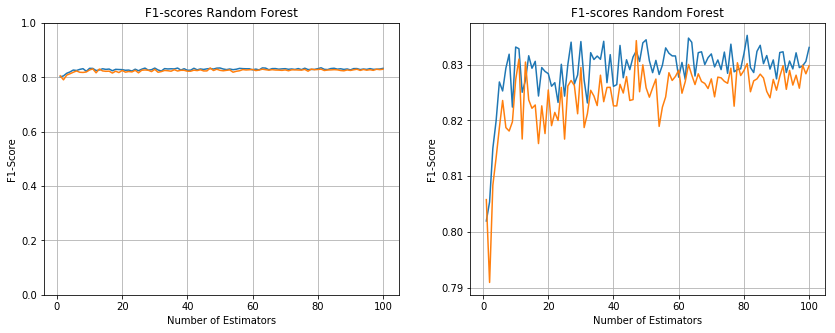

In [105]:
fig = plt.figure(figsize=(14,5))

ax1 = fig.add_subplot(121)
ax1.plot(range(1,total+1), scores_md5_train)
ax1.plot(range(1,total+1), scores_md5_test)
ax1.grid()
ax1.set_ylim(0,1)
ax1.set_title('F1-scores Random Forest')
ax1.set_xlabel('Number of Estimators')
ax1.set_ylabel('F1-Score')

ax2 = fig.add_subplot(122)
ax2.plot(range(1,total+1), scores_md5_train)
ax2.plot(range(1,total+1), scores_md5_test)
ax2.grid()
ax2.set_title('F1-scores Random Forest')
ax2.set_xlabel('Number of Estimators')
ax2.set_ylabel('F1-Score')

plt.show()

---

In [106]:
scores_md20_train = []
scores_md20_test = []
total = 50
for n in range(total):
    model = skens.RandomForestClassifier(n_estimators=n+1, max_depth=20, n_jobs=-1)
    model.fit(X_train_3, y_train_3)
    y_pred_3 = model.predict(X_train_3)
    scores_md20_train.append(skmt.f1_score(y_train_3, y_pred_3))
    y_pred_3 = model.predict(X_test_3)
    scores_md20_test.append(skmt.f1_score(y_test_3, y_pred_3))
    loading(n, total)

[=================================================>] 100%

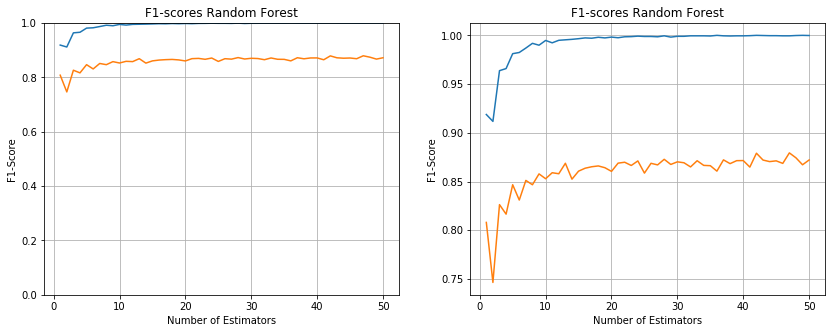

In [108]:
fig = plt.figure(figsize=(14,5))

ax1 = fig.add_subplot(121)
ax1.plot(range(1,total+1), scores_md20_train)
ax1.plot(range(1,total+1), scores_md20_test)
ax1.grid()
ax1.set_ylim(0,1)
ax1.set_title('F1-scores Random Forest')
ax1.set_xlabel('Number of Estimators')
ax1.set_ylabel('F1-Score')

ax2 = fig.add_subplot(122)
ax2.plot(range(1,total+1), scores_md20_train)
ax2.plot(range(1,total+1), scores_md20_test)
ax2.grid()
ax2.set_title('F1-scores Random Forest')
ax2.set_xlabel('Number of Estimators')
ax2.set_ylabel('F1-Score')

plt.show()

En ninguno de los casos se aprecian mejoras significativas más allá de los 10 estimadores.

---
### 3.e

#### _AdaBoost_

In [114]:
# model = skens.AdaBoostClassifier(base_estimator=Tree(), n_estimators=)
scores_adaboost_train = []
scores_adaboost_test = []
total = 50
for n in range(total):
    model = skens.AdaBoostClassifier(base_estimator=sktr.DecisionTreeClassifier(max_depth=10), n_estimators=n+1)
    model.fit(X_train_3, y_train_3)
    y_pred_3 = model.predict(X_train_3)
    scores_adaboost_train.append(skmt.f1_score(y_train_3, y_pred_3))
    y_pred_3 = model.predict(X_test_3)
    scores_adaboost_test.append(skmt.f1_score(y_test_3, y_pred_3))
    loading(n, total)

[=================================================>] 100%

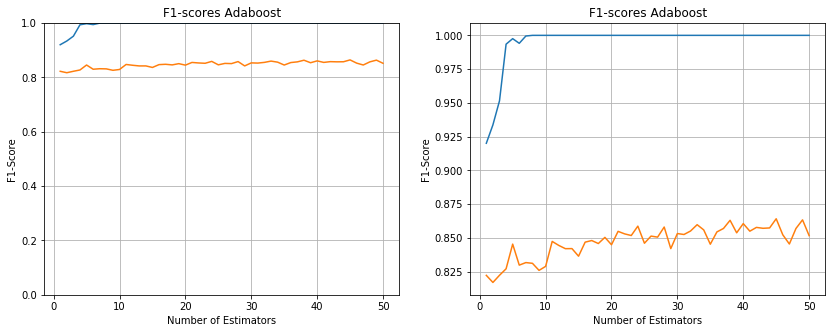

In [115]:
fig = plt.figure(figsize=(14,5))

ax1 = fig.add_subplot(121)
ax1.plot(range(1,total+1), scores_adaboost_train)
ax1.plot(range(1,total+1), scores_adaboost_test)
ax1.grid()
ax1.set_ylim(0,1)
ax1.set_title('F1-scores Adaboost')
ax1.set_xlabel('Number of Estimators')
ax1.set_ylabel('F1-Score')

ax2 = fig.add_subplot(122)
ax2.plot(range(1,total+1), scores_adaboost_train)
ax2.plot(range(1,total+1), scores_adaboost_test)
ax2.grid()
ax2.set_title('F1-scores Adaboost')
ax2.set_xlabel('Number of Estimators')
ax2.set_ylabel('F1-Score')

plt.show()

---
### 3.f

#### Otra máquina

In [118]:
scores_xtrees_train = []
scores_xtrees_test = []
total = 50
for n in range(total):
    model = skens.ExtraTreesClassifier(n_estimators=n+1, max_depth=10)
    model.fit(X_train_3, y_train_3)
    y_pred_3 = model.predict(X_train_3)
    scores_xtrees_train.append(skmt.f1_score(y_train_3, y_pred_3))
    y_pred_3 = model.predict(X_test_3)
    scores_xtrees_test.append(skmt.f1_score(y_test_3, y_pred_3))
    loading(n, total)

[=================================================>] 100%

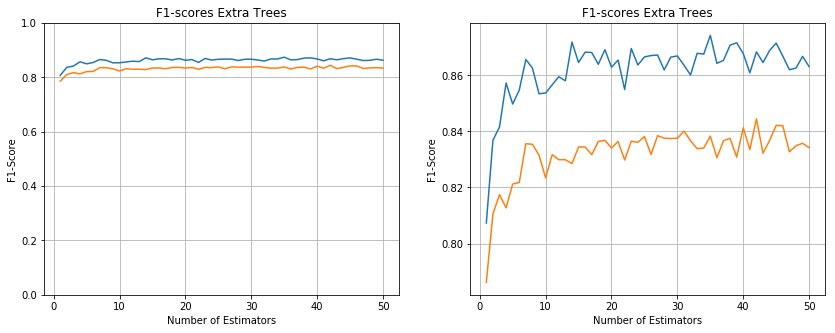

In [119]:
fig = plt.figure(figsize=(14,5))

ax1 = fig.add_subplot(121)
ax1.plot(range(1,total+1), scores_xtrees_train)
ax1.plot(range(1,total+1), scores_xtrees_test)
ax1.grid()
ax1.set_ylim(0,1)
ax1.set_title('F1-scores Extra Trees')
ax1.set_xlabel('Number of Estimators')
ax1.set_ylabel('F1-Score')

ax2 = fig.add_subplot(122)
ax2.plot(range(1,total+1), scores_xtrees_train)
ax2.plot(range(1,total+1), scores_xtrees_test)
ax2.grid()
ax2.set_title('F1-scores Extra Trees')
ax2.set_xlabel('Number of Estimators')
ax2.set_ylabel('F1-Score')

plt.show()

---

In [123]:
scores_xtrees_train = []
scores_xtrees_test = []
total = 50
for n in range(total):
    model = skens.ExtraTreesClassifier(n_estimators=n+1, max_depth=20)
    model.fit(X_train_3, y_train_3)
    y_pred_3 = model.predict(X_train_3)
    scores_xtrees_train.append(skmt.f1_score(y_train_3, y_pred_3))
    y_pred_3 = model.predict(X_test_3)
    scores_xtrees_test.append(skmt.f1_score(y_test_3, y_pred_3))
    loading(n, total)

[=================================================>] 100%

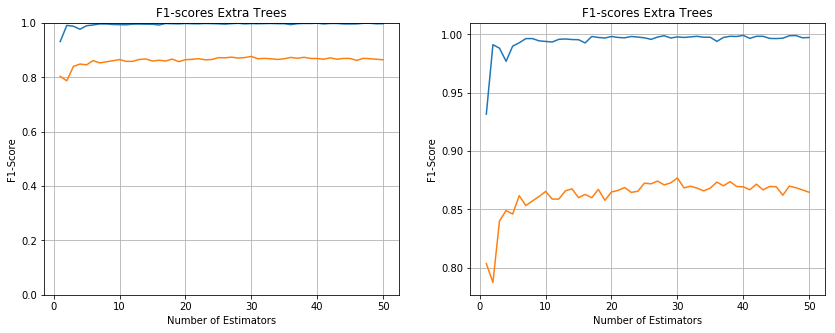

In [125]:
fig = plt.figure(figsize=(14,5))

ax1 = fig.add_subplot(121)
ax1.plot(range(1,total+1), scores_xtrees_train)
ax1.plot(range(1,total+1), scores_xtrees_test)
ax1.grid()
ax1.set_ylim(0,1)
ax1.set_title('F1-scores Extra Trees')
ax1.set_xlabel('Number of Estimators')
ax1.set_ylabel('F1-Score')

ax2 = fig.add_subplot(122)
ax2.plot(range(1,total+1), scores_xtrees_train)
ax2.plot(range(1,total+1), scores_xtrees_test)
ax2.grid()
ax2.set_title('F1-scores Extra Trees')
ax2.set_xlabel('Number of Estimators')
ax2.set_ylabel('F1-Score')

plt.show()

---
### 3.g

#### Importancia de los Atributos

In [151]:
model = skens.RandomForestClassifier(n_estimators=20, max_depth=20, n_jobs=-1)
model.fit(X_train_3, y_train_3)
feats = list(zip(model.feature_importances_, X_train_3.columns))
feats.sort(reverse=True)

print("Feature Importance Random Forest:")
for i, j in feats:
    print("{:>20}: {:10.09f}".format(j, i))

Feature Importance Random Forest:
             alcohol: 0.151073187
    volatile acidity: 0.113061196
             density: 0.104958972
         citric acid: 0.086826055
           chlorides: 0.085220170
total sulfur dioxide: 0.080367642
 free sulfur dioxide: 0.078971809
           sulphates: 0.077673190
      residual sugar: 0.074308250
                  pH: 0.073929093
       fixed acidity: 0.069270481
                type: 0.004339956


In [154]:
model = skens.AdaBoostClassifier(base_estimator=sktr.DecisionTreeClassifier(max_depth=20), n_estimators=20)
model.fit(X_train_3, y_train_3)
feats = list(zip(model.feature_importances_, X_train_3.columns))
feats.sort(reverse=True)

print("Feature Importance AdaBoost:")
for i, j in feats:
    print("{:>20}: {:10.09f}".format(j, i))

Feature Importance AdaBoost:
                  pH: 0.123280340
         citric acid: 0.117785371
total sulfur dioxide: 0.117088436
    volatile acidity: 0.111010815
           chlorides: 0.098865425
 free sulfur dioxide: 0.098251709
      residual sugar: 0.084123864
             alcohol: 0.075453012
       fixed acidity: 0.066878476
           sulphates: 0.057388058
             density: 0.049873850
                type: 0.000000644


---

---
## 4.- Lenguaje de Señas

---
### 4.a

#### Datos

In [157]:
def load_data():
    train = pd.read_csv('sign_mnist_train.csv')
    test = pd.read_csv('sign_mnist_test.csv')
    y_tr = train['label']
    x_tr = train.iloc[:,1:]
    y_t = test['label']
    x_t = test.iloc[:,1:]
    x_tr, x_v, y_tr, y_v = skms.train_test_split(x_tr, y_tr)
    return(x_tr,x_v,x_t,y_tr,y_v,y_t)

In [164]:
x_tr, x_v, x_t, y_tr, y_v, y_t = load_data()
print("Number of columns :", x_tr.shape[1])
print("Training size     :", x_tr.shape[0])
print("Validation size   :", x_v.shape[0])
print("Testing size      :", x_t.shape[0])

Number of columns : 784
Training size     : 20591
Validation size   : 6864
Testing size      : 7172


---
### 4.b

#### Escalar los datos

In [160]:
x_tr.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
17739,164,166,168,171,173,174,176,176,177,178,...,209,208,207,208,206,205,204,201,200,198
22769,175,176,176,174,174,175,175,173,172,173,...,16,0,6,14,0,1,0,0,21,129
14181,170,170,171,171,170,169,170,169,169,170,...,191,191,189,188,187,184,182,180,186,127
10377,64,93,97,101,106,111,118,129,135,141,...,176,195,192,193,196,197,200,200,201,202
7408,51,57,71,85,92,99,105,109,111,113,...,139,168,163,167,169,168,169,169,169,169


In [163]:
x_tr_255 = x_tr / 255
x_v_255 = x_v / 255
x_t_255 = x_t / 255
x_tr_255.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
17739,0.643137,0.650980,0.658824,0.670588,0.678431,0.682353,0.690196,0.690196,0.694118,0.698039,...,0.819608,0.815686,0.811765,0.815686,0.807843,0.803922,0.800000,0.788235,0.784314,0.776471
22769,0.686275,0.690196,0.690196,0.682353,0.682353,0.686275,0.686275,0.678431,0.674510,0.678431,...,0.062745,0.000000,0.023529,0.054902,0.000000,0.003922,0.000000,0.000000,0.082353,0.505882
14181,0.666667,0.666667,0.670588,0.670588,0.666667,0.662745,0.666667,0.662745,0.662745,0.666667,...,0.749020,0.749020,0.741176,0.737255,0.733333,0.721569,0.713725,0.705882,0.729412,0.498039
10377,0.250980,0.364706,0.380392,0.396078,0.415686,0.435294,0.462745,0.505882,0.529412,0.552941,...,0.690196,0.764706,0.752941,0.756863,0.768627,0.772549,0.784314,0.784314,0.788235,0.792157
7408,0.200000,0.223529,0.278431,0.333333,0.360784,0.388235,0.411765,0.427451,0.435294,0.443137,...,0.545098,0.658824,0.639216,0.654902,0.662745,0.658824,0.662745,0.662745,0.662745,0.662745


In [170]:
scaler = skpp.StandardScaler()
scaler.fit(pd.concat([x_tr, x_v]))
x_tr_ss = scaler.transform(x_tr)
x_v_ss = scaler.transform(x_v)
x_t_ss = scaler.transform(x_t)
x_tr_ss

array([[ 0.23165213,  0.18776813,  0.17288916, ..., -2.55881007,
        -2.53324605, -2.48191724],
       [-0.03431945, -0.03756183, -0.03194715, ...,  0.42708664,
         0.42229863,  0.42200457],
       [-2.81493143, -2.46611816, -2.48998294, ...,  0.49028022,
         0.50090354,  0.53070753],
       ..., 
       [ 0.47344447,  0.38806144,  0.37772548, ..., -1.31073684,
        -1.81008087, -2.3421563 ],
       [ 0.76359529,  0.6885014 ,  0.60816633, ...,  0.9010385 ,
         0.56378747,  0.48412055],
       [-0.13103639, -0.16274515, -0.23678347, ...,  0.03212676,
         0.04499505,  0.06483772]])

---
### 4.c

#### Neural Network

In [250]:
model1 = krms.Sequential()
model1.add(krly.Dense(30, input_dim=x_tr.shape[1], kernel_initializer='uniform', activation='sigmoid'))
model1.add(krly.Dense(30, kernel_initializer='uniform', activation='sigmoid'))
model1.add(krly.Dense(25, kernel_initializer='uniform', activation='softmax'))
model1.compile(optimizer=kropt.SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])

In [251]:
model1.fit(
    x_tr_255.values,
    krnpu.to_categorical(y_tr),
    epochs=100,
    batch_size=128,
    verbose=1,
    validation_data=( x_v_255.values, krnpu.to_categorical(y_v) )
)

Train on 20591 samples, validate on 6864 samples
Epoch 1/100
20591/20591 [==============================] - 1s 65us/step - loss: 3.1974 - acc: 0.0451 - val_loss: 3.1881 - val_acc: 0.0453
Epoch 2/100
20591/20591 [==============================] - 1s 57us/step - loss: 3.1844 - acc: 0.0453 - val_loss: 3.1833 - val_acc: 0.0453
Epoch 3/100
20591/20591 [==============================] - 1s 54us/step - loss: 3.1814 - acc: 0.0464 - val_loss: 3.1809 - val_acc: 0.0453
Epoch 4/100
20591/20591 [==============================] - 1s 52us/step - loss: 3.1801 - acc: 0.0472 - val_loss: 3.1801 - val_acc: 0.0440
Epoch 5/100
20591/20591 [==============================] - 1s 53us/step - loss: 3.1793 - acc: 0.0449 - val_loss: 3.1795 - val_acc: 0.0481
Epoch 6/100
20591/20591 [==============================] - 1s 51us/step - loss: 3.1789 - acc: 0.0468 - val_loss: 3.1798 - val_acc: 0.0453
Epoch 7/100
20591/20591 [==============================] - 1s 52us/step - loss: 3.1784 - acc: 0.0467 - val_loss: 3.1791 - v

20591/20591 [==============================] - 1s 52us/step - loss: 3.1768 - acc: 0.0457 - val_loss: 3.1776 - val_acc: 0.0453
Epoch 60/100
20591/20591 [==============================] - 1s 50us/step - loss: 3.1768 - acc: 0.0461 - val_loss: 3.1767 - val_acc: 0.0453
Epoch 61/100
20591/20591 [==============================] - 1s 49us/step - loss: 3.1766 - acc: 0.0446 - val_loss: 3.1768 - val_acc: 0.0453
Epoch 62/100
20591/20591 [==============================] - 1s 51us/step - loss: 3.1766 - acc: 0.0455 - val_loss: 3.1766 - val_acc: 0.0453
Epoch 63/100
20591/20591 [==============================] - 1s 51us/step - loss: 3.1768 - acc: 0.0456 - val_loss: 3.1773 - val_acc: 0.0453
Epoch 64/100
20591/20591 [==============================] - 1s 50us/step - loss: 3.1766 - acc: 0.0456 - val_loss: 3.1773 - val_acc: 0.0453
Epoch 65/100
20591/20591 [==============================] - 1s 49us/step - loss: 3.1767 - acc: 0.0459 - val_loss: 3.1770 - val_acc: 0.0457
Epoch 66/100
20591/20591 [==============

---

In [232]:
model2 = krms.Sequential()
model2.add(krly.Dense(30, input_dim=x_tr.shape[1], kernel_initializer='uniform', activation='relu'))
model2.add(krly.Dense(30, kernel_initializer='uniform', activation='relu'))
model2.add(krly.Dense(25, kernel_initializer='uniform', activation='softmax'))
model2.compile(optimizer=kropt.SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])

In [236]:
model2.fit(
    x_tr_ss,
    krnpu.to_categorical(y_tr),
    epochs=100,
    batch_size=128,
    verbose=1,
    validation_data=( x_v_ss, krnpu.to_categorical(y_v) )
)

/home/vlizana/u/machine-learning/v-temp/lib/python3.5/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 20591 samples, validate on 6864 samples
Epoch 1/100
20591/20591 [==============================] - 1s 65us/step - loss: 3.2062 - acc: 0.0772 - val_loss: 3.1847 - val_acc: 0.0893
Epoch 2/100
20591/20591 [==============================] - 1s 55us/step - loss: 3.0211 - acc: 0.1203 - val_loss: 2.7535 - val_acc: 0.1767
Epoch 3/100
20591/20591 [==============================] - 1s 55us/step - loss: 2.3796 - acc: 0.2446 - val_loss: 1.9849 - val_acc: 0.3231
Epoch 4/100
20591/20591 [==============================] - 1s 54us/step - loss: 1.7513 - acc: 0.4016 - val_loss: 1.5099 - val_acc: 0.5017
Epoch 5/100
20591/20591 [==============================] - 1s 56us/step - loss: 1.3092 - acc: 0.5551 - val_loss: 1.0860 - val_acc: 0.6479
Epoch 6/100
20591/20591 [==============================] - 1s 55us/step - loss: 0.9330 - acc: 0.6897 - val_loss: 0.7822 - val_acc: 0.7517
Epoch 7/100
20591/20591 [==============================] - 1s 54us/step - loss: 0.6636 - acc: 0.7926 - val_loss: 0.5533 - v

20591/20591 [==============================] - 1s 50us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 60/100
20591/20591 [==============================] - 1s 51us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 61/100
20591/20591 [==============================] - 1s 50us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 62/100
20591/20591 [==============================] - 1s 54us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 63/100
20591/20591 [==============================] - 1s 50us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 64/100
20591/20591 [==============================] - 1s 49us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 65/100
20591/20591 [==============================] - 1s 51us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 66/100
20591/20591 [==============

---

In [279]:
reduc = skda.LinearDiscriminantAnalysis(n_components=200)
reduc.fit(x_tr_ss, y_tr)
x_tr_reduc = reduc.transform(x_tr_ss)
x_v_reduc = reduc.transform(x_v_ss)
x_t_reduc = reduc.transform(x_t_ss)

In [283]:
model3 = krms.Sequential()
model3.add(krly.Dense(30, input_dim=x_tr_reduc.shape[1], kernel_initializer='uniform', activation='relu'))
model3.add(krly.Dense(30, kernel_initializer='uniform', activation='relu'))
model3.add(krly.Dense(25, kernel_initializer='uniform', activation='softmax'))
model3.compile(optimizer=kropt.SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])

In [284]:
model3.fit(
    x_tr_reduc,
    krnpu.to_categorical(y_tr),
    epochs=100,
    batch_size=128,
    verbose=1,
    validation_data=( x_v_reduc, krnpu.to_categorical(y_v) )
)

Train on 20591 samples, validate on 6864 samples
Epoch 1/100
20591/20591 [==============================] - ETA: 0s - loss: 3.2096 - acc: 0.086 - 1s 39us/step - loss: 3.2095 - acc: 0.0863 - val_loss: 3.1999 - val_acc: 0.0884
Epoch 2/100
20591/20591 [==============================] - 1s 27us/step - loss: 3.1841 - acc: 0.1185 - val_loss: 3.1592 - val_acc: 0.1974
Epoch 3/100
20591/20591 [==============================] - 1s 26us/step - loss: 3.0094 - acc: 0.1965 - val_loss: 2.6977 - val_acc: 0.2551
Epoch 4/100
20591/20591 [==============================] - 1s 27us/step - loss: 2.0677 - acc: 0.4327 - val_loss: 1.3082 - val_acc: 0.6888
Epoch 5/100
20591/20591 [==============================] - 1s 27us/step - loss: 0.7763 - acc: 0.8507 - val_loss: 0.4310 - val_acc: 0.9267
Epoch 6/100
20591/20591 [==============================] - 1s 27us/step - loss: 0.2533 - acc: 0.9603 - val_loss: 0.1960 - val_acc: 0.9605
Epoch 7/100
20591/20591 [==============================] - 1s 28us/step - loss: 0.131

20591/20591 [==============================] - 1s 24us/step - loss: 0.0053 - acc: 0.9993 - val_loss: 0.0138 - val_acc: 0.9966
Epoch 60/100
20591/20591 [==============================] - 0s 24us/step - loss: 0.0052 - acc: 0.9993 - val_loss: 0.0136 - val_acc: 0.9966
Epoch 61/100
20591/20591 [==============================] - 1s 24us/step - loss: 0.0051 - acc: 0.9993 - val_loss: 0.0137 - val_acc: 0.9968
Epoch 62/100
20591/20591 [==============================] - 0s 24us/step - loss: 0.0050 - acc: 0.9994 - val_loss: 0.0134 - val_acc: 0.9968
Epoch 63/100
20591/20591 [==============================] - 1s 25us/step - loss: 0.0048 - acc: 0.9993 - val_loss: 0.0134 - val_acc: 0.9969
Epoch 64/100
20591/20591 [==============================] - 0s 24us/step - loss: 0.0047 - acc: 0.9994 - val_loss: 0.0135 - val_acc: 0.9968
Epoch 65/100
20591/20591 [==============================] - 1s 25us/step - loss: 0.0046 - acc: 0.9994 - val_loss: 0.0135 - val_acc: 0.9968
Epoch 66/100
20591/20591 [==============

---

In [321]:
model4 = krms.Sequential()
model4.add(krly.Dense(50, input_dim=x_tr_ss.shape[1], kernel_regularizer=krrg.l2(0.0001), kernel_initializer='normal', activation='relu'))
model4.add(krly.Dense(25, kernel_initializer='uniform', activation='softmax'))
model4.compile(optimizer=kropt.SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])

In [322]:
model4.fit(
    x_tr_ss,
    krnpu.to_categorical(y_tr),
    epochs=100,
    batch_size=500,
    verbose=1,
    validation_data=( x_v_ss, krnpu.to_categorical(y_v) )
)

Train on 20591 samples, validate on 6864 samples
Epoch 1/100
20591/20591 [==============================] - 1s 50us/step - loss: 2.9787 - acc: 0.1873 - val_loss: 2.6451 - val_acc: 0.2899
Epoch 2/100
20591/20591 [==============================] - 1s 43us/step - loss: 2.3754 - acc: 0.3545 - val_loss: 2.0890 - val_acc: 0.4280
Epoch 3/100
20591/20591 [==============================] - 1s 40us/step - loss: 1.8995 - acc: 0.4866 - val_loss: 1.6938 - val_acc: 0.5441
Epoch 4/100
20591/20591 [==============================] - 1s 41us/step - loss: 1.5562 - acc: 0.5851 - val_loss: 1.4085 - val_acc: 0.6321
Epoch 5/100
20591/20591 [==============================] - 1s 40us/step - loss: 1.3014 - acc: 0.6561 - val_loss: 1.1884 - val_acc: 0.6824
Epoch 6/100
20591/20591 [==============================] - 1s 39us/step - loss: 1.1092 - acc: 0.7095 - val_loss: 1.0284 - val_acc: 0.7279
Epoch 7/100
20591/20591 [==============================] - 1s 40us/step - loss: 0.9578 - acc: 0.7554 - val_loss: 0.9045 - v

20591/20591 [==============================] - 1s 39us/step - loss: 0.0420 - acc: 1.0000 - val_loss: 0.0440 - val_acc: 1.0000
Epoch 60/100
20591/20591 [==============================] - 1s 39us/step - loss: 0.0413 - acc: 1.0000 - val_loss: 0.0433 - val_acc: 1.0000
Epoch 61/100
20591/20591 [==============================] - 1s 39us/step - loss: 0.0406 - acc: 1.0000 - val_loss: 0.0426 - val_acc: 1.0000
Epoch 62/100
20591/20591 [==============================] - 1s 38us/step - loss: 0.0399 - acc: 1.0000 - val_loss: 0.0420 - val_acc: 1.0000
Epoch 63/100
20591/20591 [==============================] - 1s 39us/step - loss: 0.0394 - acc: 1.0000 - val_loss: 0.0413 - val_acc: 1.0000
Epoch 64/100
20591/20591 [==============================] - 1s 37us/step - loss: 0.0388 - acc: 1.0000 - val_loss: 0.0407 - val_acc: 1.0000
Epoch 65/100
20591/20591 [==============================] - 1s 36us/step - loss: 0.0382 - acc: 1.0000 - val_loss: 0.0401 - val_acc: 1.0000
Epoch 66/100
20591/20591 [==============

---
### 4.d

#### Matriz de confusión

In [506]:
def plot_cnf_matrix(model, x, y):
    pred = model.predict_classes(x)
    cnf_matrix = skmt.confusion_matrix(y.values, pred)
    
    fig = plt.figure(figsize=(18,16))
    
    ax = fig.add_subplot(111)
    sbrn.heatmap(cnf_matrix, cmap="coolwarm_r", annot=True, linewidths=0.5, ax=ax, fmt="d", xticklabels=range(1,25), yticklabels=range(1,25))
    plt.title("Confussion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("Real Class")

    plt.show()

---

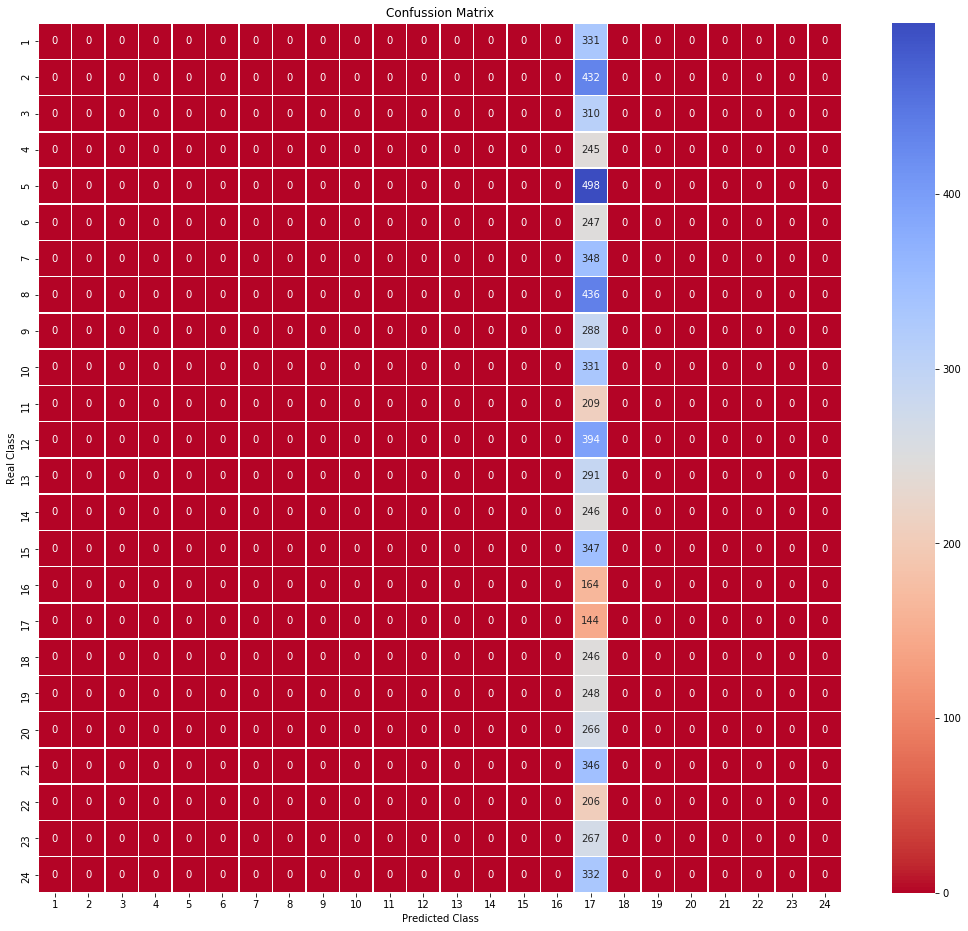

In [507]:
plot_cnf_matrix(model1, x_t_255, y_t)

---

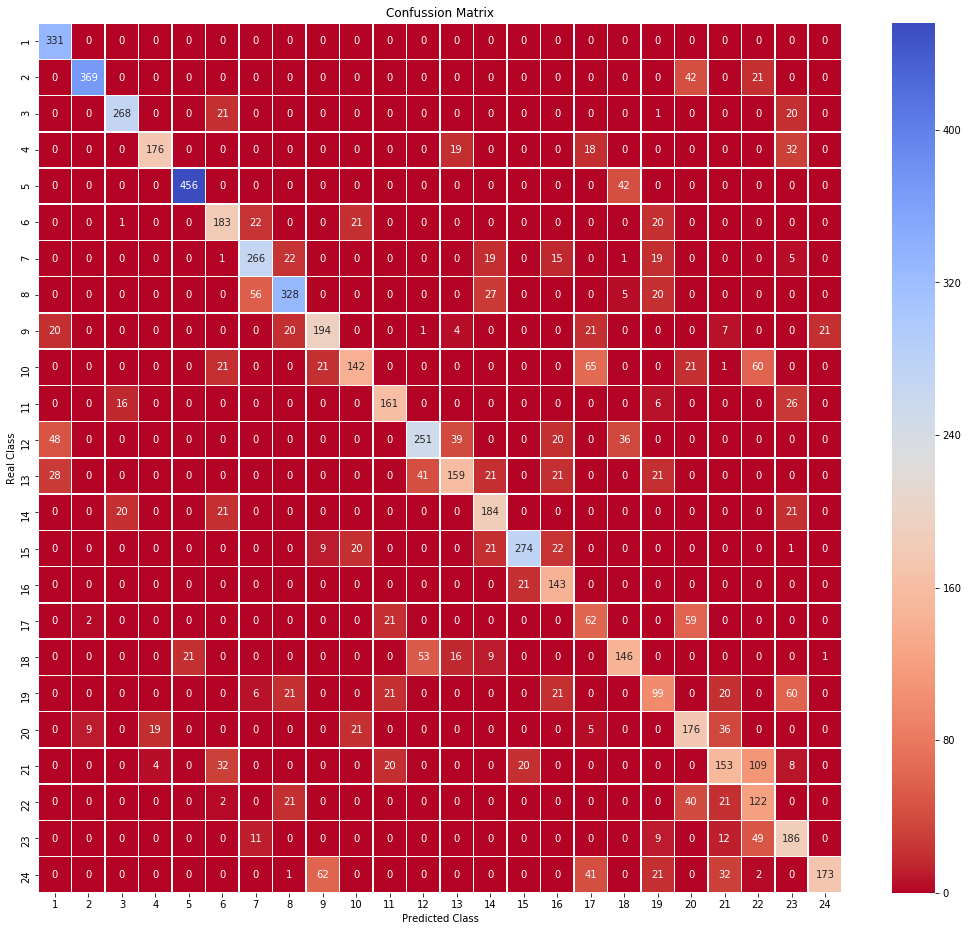

In [508]:
plot_cnf_matrix(model2, x_t_ss, y_t)

---

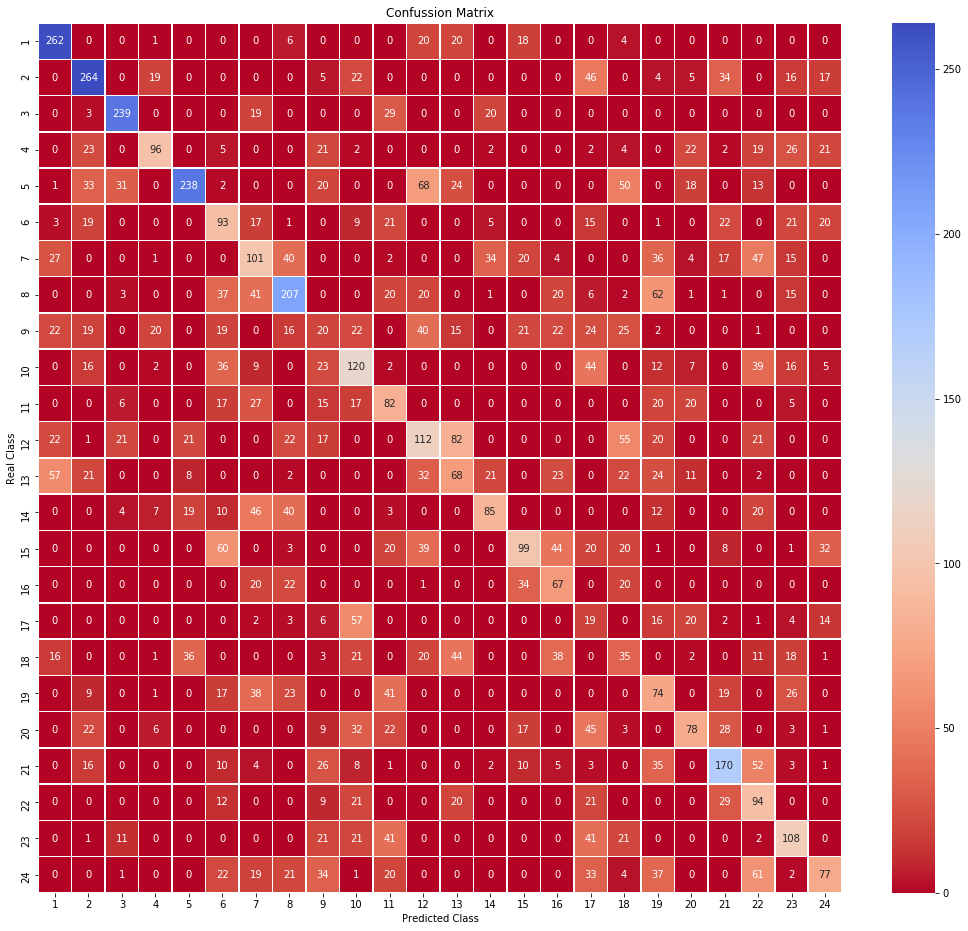

In [509]:
plot_cnf_matrix(model3, x_t_reduc, y_t)

---

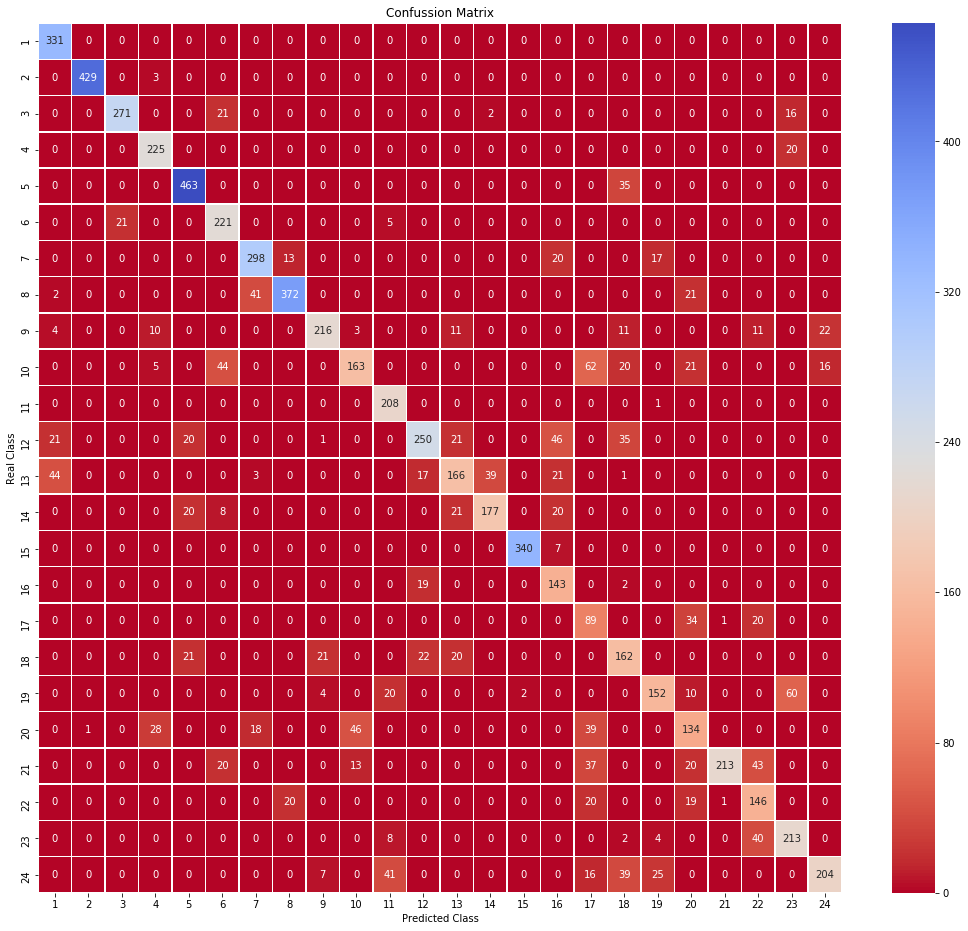

In [510]:
plot_cnf_matrix(model4, x_t_ss, y_t)

---

In [323]:
eval_train_4 = model4.evaluate(x_tr_ss, krnpu.to_categorical(y_tr))
eval_val_4 = model4.evaluate(x_v_ss, krnpu.to_categorical(y_v))
eval_test_4 = model4.evaluate(x_t_ss, krnpu.to_categorical(y_t))

7172/7172 [==============================] - 0s 50us/step


In [324]:
print("Error over Train Set      : {:10.9f}".format(1-eval_train_4[1]))
print("Error over Validation Set : {:10.9f}".format(1-eval_val_4[1]))
print("Error over Test Set       : {:10.9f}".format(1-eval_test_4[1]))

Error over Train Set      : 0.000000000
Error over Validation Set : 0.000000000
Error over Test Set       : 0.221137758


---
### 4.e

#### SVM no lineal

---
### 4.f

#### Arbol de clasificación

---

---

---